In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

In [2]:
df = pd.read_csv('datasets/placement.csv')
df1 = pd.read_csv('datasets/gpa_iq.csv')
print(df.shape)
df.head(5)

(200, 2)


,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
df1.head(5)

,obs,gpa,iq,gender,placement
0,1,7.940,111,2,1
1,2,8.292,107,2,1
2,3,4.643,100,2,0
3,4,7.470,107,2,1
4,5,8.882,114,1,1


In [4]:
new_df = df
new_df['iq'] = df1['iq']
new_df.head(5)

,cgpa,package,iq
0,6.89,3.26,111.0
1,5.12,1.98,107.0
2,7.82,3.25,100.0
3,7.42,3.67,107.0
4,6.94,3.57,114.0


<Axes: xlabel='cgpa', ylabel='package'>

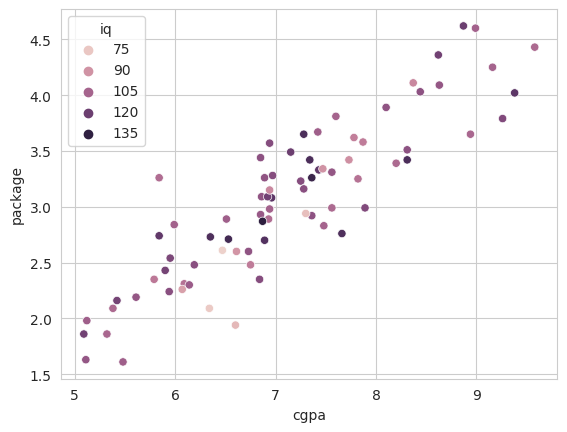

In [5]:
sns.scatterplot(data=new_df,x='cgpa',y='package',hue='iq')
#below plot show that data distribution is some sort of linear 

In [6]:
mean_value = df['iq'].mean()
df['iq'].fillna(value=mean_value, inplace=True)
mean_value = df['cgpa'].mean()
df['cgpa'].fillna(value=mean_value, inplace=True)
x_train,x_test,y_train,y_test = train_test_split(df[['cgpa','iq']],df['package'],test_size=0.3,random_state=45,shuffle=True)
print(x_train.head(2))
print(x_test.head(2))


     cgpa          iq
74   6.85  112.000000
113  6.94  108.923077
    cgpa    iq
45  7.87  97.0
72  7.78  96.0


In [7]:
ll = LinearRegression()
ll.fit(x_train,y_train)
print(ll.intercept_)
print(ll.coef_)
y_pred = ll.predict(x_test)
print(y_pred.shape)

-1.4521737650068305
[0.5745254  0.00388572]
(60,)


<Axes: xlabel='cgpa', ylabel='package'>

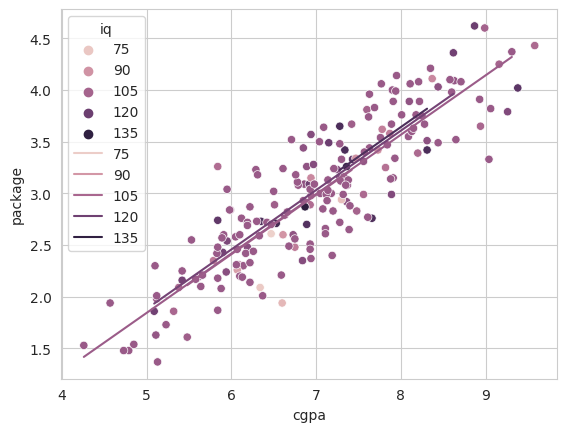

In [8]:
sns.scatterplot(data=new_df,x='cgpa',y='package',hue='iq')
sns.lineplot(x=x_test['cgpa'],y= y_pred,hue=x_test['iq'])

In [9]:
mean_value = df['cgpa'].mean()
df['cgpa'].fillna(value=mean_value, inplace=True)
x_train,x_test,y_train,y_test = train_test_split(df['cgpa'],df['package'],test_size=0.3,random_state=45,shuffle=True)

In [10]:
class Grediant:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        self.coefficients_ = None
        self.intercept_ = None
        
    def fit_simple_regression(self,x_train,y_train):
        for i in range(self.epochs):
            loss_b = -2*np.sum(y_train-self.m*x_train.ravel()-self.b)
            loss_m = -2*np.sum((y_train-self.m*x_train.ravel()-self.b)*x_train.ravel())
            self.b = self.b - (self.lr*loss_b)
            self.m = self.m - (self.lr*loss_m)
        
        return self.b,self.m
    
    def fit_multiple_linear_regression_batch(self,x_train,y_train):
        # this method is computationally expensive
        self.intercept_ = 0
        self.coefficients_ = np.ones(x_train.shape[1])
        for i in range(self.epochs):
            y_hat = np.dot(x_train,self.coefficients_) + self.intercept_
            intercept_der = -2*np.mean(y_train-y_hat)
            self.intercept_ = self.intercept_ - (self.lr*intercept_der)
            
            coeffient_der = -2*np.dot((y_train-y_hat),x_train)/x_train.shape[0]
            self.coefficients_ = self.coefficients_ - (self.lr*coeffient_der)
        
        return self.intercept_,self.coefficients_
    
    
    def fit_multiple_linear_regression_stochastic(self,x_train,y_train):
        # this methode is better than grediant descent due to less computational calculation
        self.intercept_ = 0
        self.coefficients_ = np.ones(x_train.shape[1])
        for i in range(self.epochs):
            for j in range(x_train.shape[0]):
                random_index = np.random.randint(0,x_train.shape[0])
                y_hat = np.dot(x_train[random_index],self.coefficients_) + self.intercept_
                intercept_der = -2*(y_train[random_index]-y_hat)
                self.intercept_ = self.intercept_ -(self.lr*intercept_der)
                
                coeffient_der = -2*np.dot((y_train[random_index]-y_hat),x_train[random_index])
                self.coefficients_ = self.coefficients_ - (self.lr*coeffient_der)
                
        return self.intercept_,self.coefficients_
    
    def fit_multiple_linear_regression_mini_batch(self,x_train,y_train):
        self.intercept_  = 0
        self.coefficients_ = np.ones(x_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(x_train.shape[0]//self.m):
                random_index1 = np.random.randint(0,x_train.shape[0])
                random_index2 = np.random.randint(1,x_train.shape[0])
                y_hat = np.dot(x_train[random_index1:random_index2,:],self.coefficients_) + self.intercept_
                intercept_der = -2*np.mean(y_train[random_index1:random_index2,:]-y_hat)
                self.intercept_ = self.intercept_ -(self.lr*intercept_der)

                coeffient_der = -2*np.dot((y_train[random_index1:random_index2,:]-y_hat),
                                          x_train[random_index1:random_index2,:])
                self.coefficients_ = self.coefficients_ - (self.lr*coeffient_der)
                
        return self.intercept_,self.coefficients_
    
    def predict_simple_regression(self,x_test):
        return self.m*x_test+self.b
    
    def predict_multiple_linear_regression(self,x_test):
        # simple linear equation 
        return np.dot(x_test,self.coefficients_) + self.intercept_

In [11]:

gd = Grediant(0.01,100)
gd.fit_simple_regression(x_train,y_train)
y_pred = gd.predict_simple_regression(x_test)
print(y_pred.shape)

(60,)


<Axes: xlabel='cgpa', ylabel='package'>

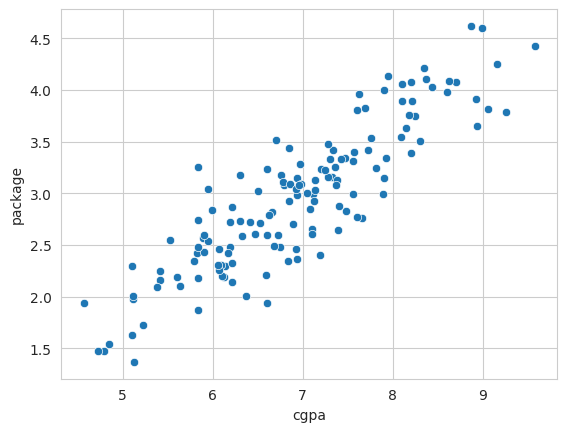

In [12]:
sns.scatterplot(x=x_train,y=y_train)

<Axes: xlabel='cgpa', ylabel='cgpa'>

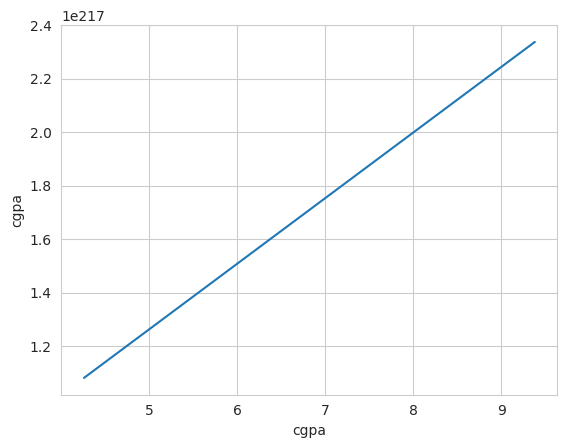

In [13]:
sns.lineplot(x=x_test,y=y_pred)

In [14]:
r1 = np.random.randint(1,df.shape[0])
r2 = np.random.randint(1,df.shape[0])
df.iloc[r1:r2,:].shape

(79, 3)